In [7]:
import matplotlib.pyplot as plt
import numpy as np

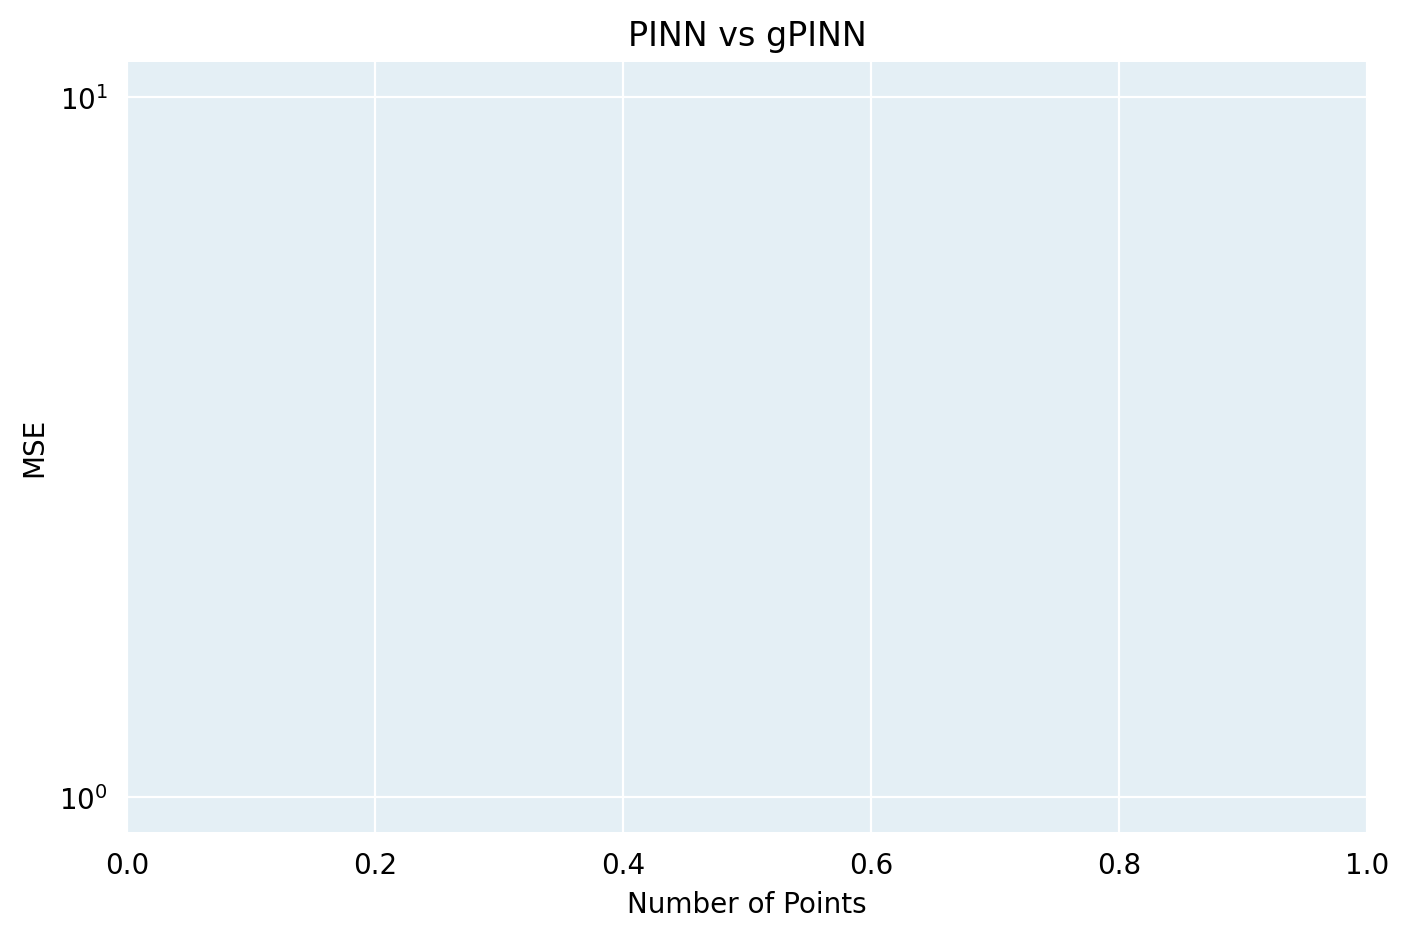

In [27]:
fig,ax = plt.subplots(figsize=(8,5),dpi=200)
ax.grid(color='white')
#ax.set_facecolor("silver")
ax.set_facecolor('#e4eff5')
ax.set_title("PINN vs gPINN")
ax.set_xlabel("Number of Points")
ax.set_ylabel("MSE")
ax.set_yscale("log")


def create_plot():
    fig,ax = plt.subplots(figsize=(8,5),dpi=300)
    ax.grid(color='white')
    #ax.set_xscale("log")
    ax.set_yscale("log")
    #ax.set_facecolor("aliceblue")
    ax.set_facecolor('#e4eff5')
    ax.set_title("1D Burgers Equation Pareto Curve")
    ax.set_xlabel("Training time (s)")
    ax.set_ylabel("MSE")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(bottom = False,left = False)
    ax.tick_params(axis='x', which='minor', bottom=False, 
                   top=False, labelbottom=True) 
    ax.tick_params(axis='y', which='minor', right=False, 
                   left=False, labelleft=True) 
    
    return fig,ax

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom = False,left = False)
ax.tick_params(axis='x', which='minor', bottom=False, 
               top=False, labelbottom=True) 
ax.tick_params(axis='y', which='minor', right=False, 
               left=False, labelleft=True) 

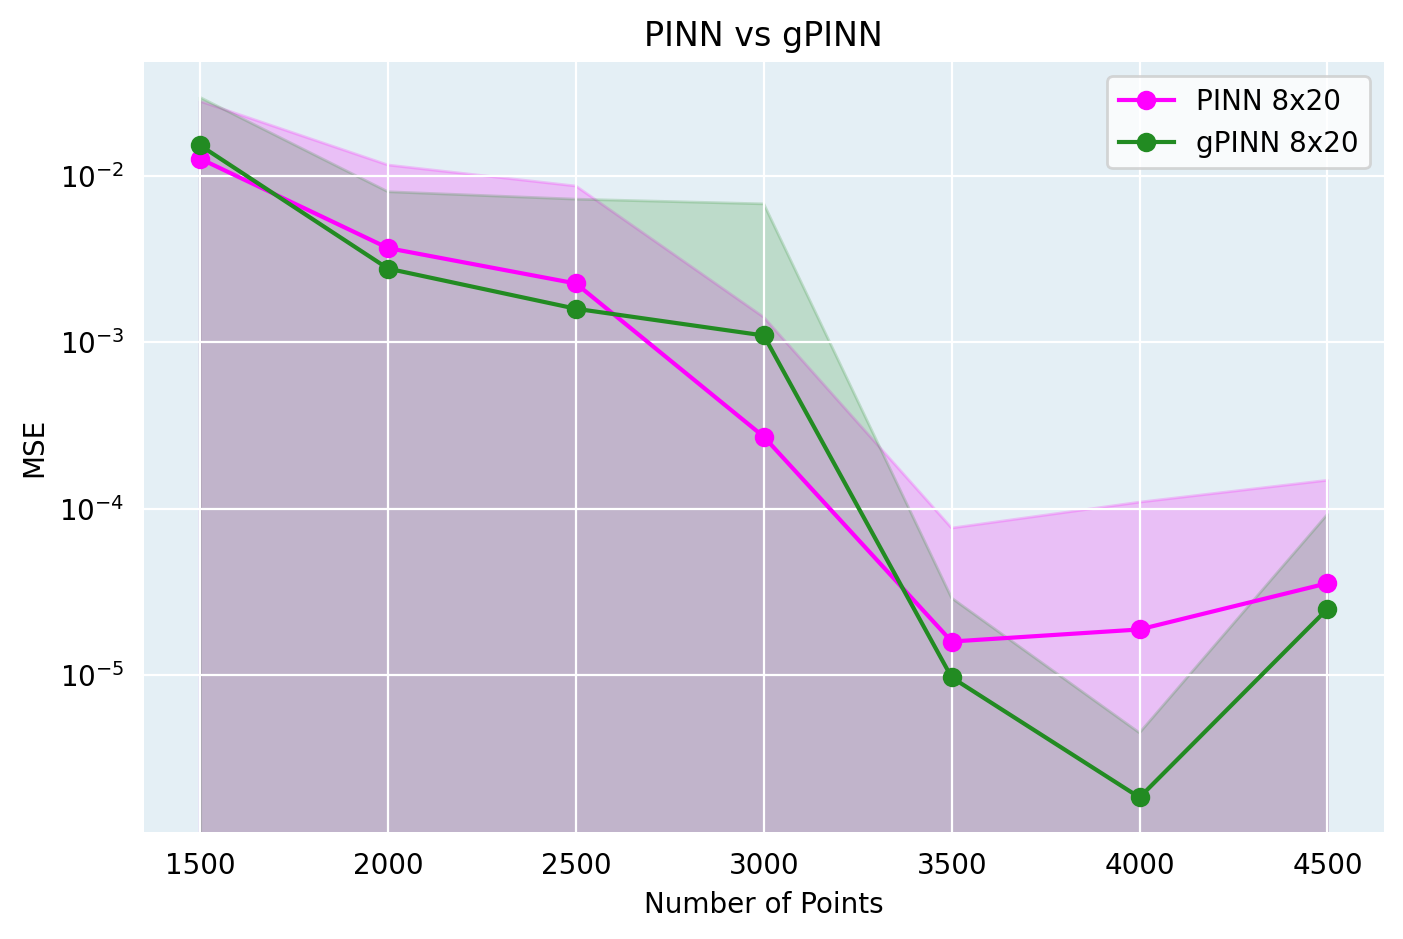

In [6]:
num_points_arr =[1500,2000,2500,3000,3500,4000,4500]
gpinn_mean_mses = []
gpinn_stds = []
pinn_mean_mses = []
pinn_stds = []
for num_points in num_points_arr:

    vanilla = np.load(f'Data_gPINN_vs_PINN/mses_vanilla_{num_points}.npy')
    pinn_mean_mses.append(np.mean(vanilla))
    pinn_stds.append(np.std(vanilla))

    gpinn = np.load(f'Data_gPINN_vs_PINN/mses_{num_points}.npy')
    gpinn_mean_mses.append(np.mean(gpinn))
    gpinn_stds.append(np.std(gpinn))
        
gpinn_mean_mses = np.array(gpinn_mean_mses)
gpinn_stds = np.array(gpinn_stds)
pinn_mean_mses = np.array(pinn_mean_mses)
pinn_stds = np.array(pinn_stds)

ax.plot(num_points_arr,pinn_mean_mses,label='PINN 8x20',color='fuchsia',marker='o')
ax.fill_between(num_points_arr, pinn_mean_mses-pinn_stds, pinn_mean_mses+pinn_stds,color='fuchsia',alpha=0.2)
ax.plot(num_points_arr,gpinn_mean_mses,label='gPINN 8x20',color='forestgreen',marker='o')
ax.fill_between(num_points_arr, gpinn_mean_mses-gpinn_stds, gpinn_mean_mses+gpinn_stds,alpha=0.2,color='forestgreen')

ax.legend()
fig

In [5]:
vanilla = np.load(f'Data_gPINN_vs_PINN/mses_vanilla_{num_points}.npy')
len(vanilla)

30

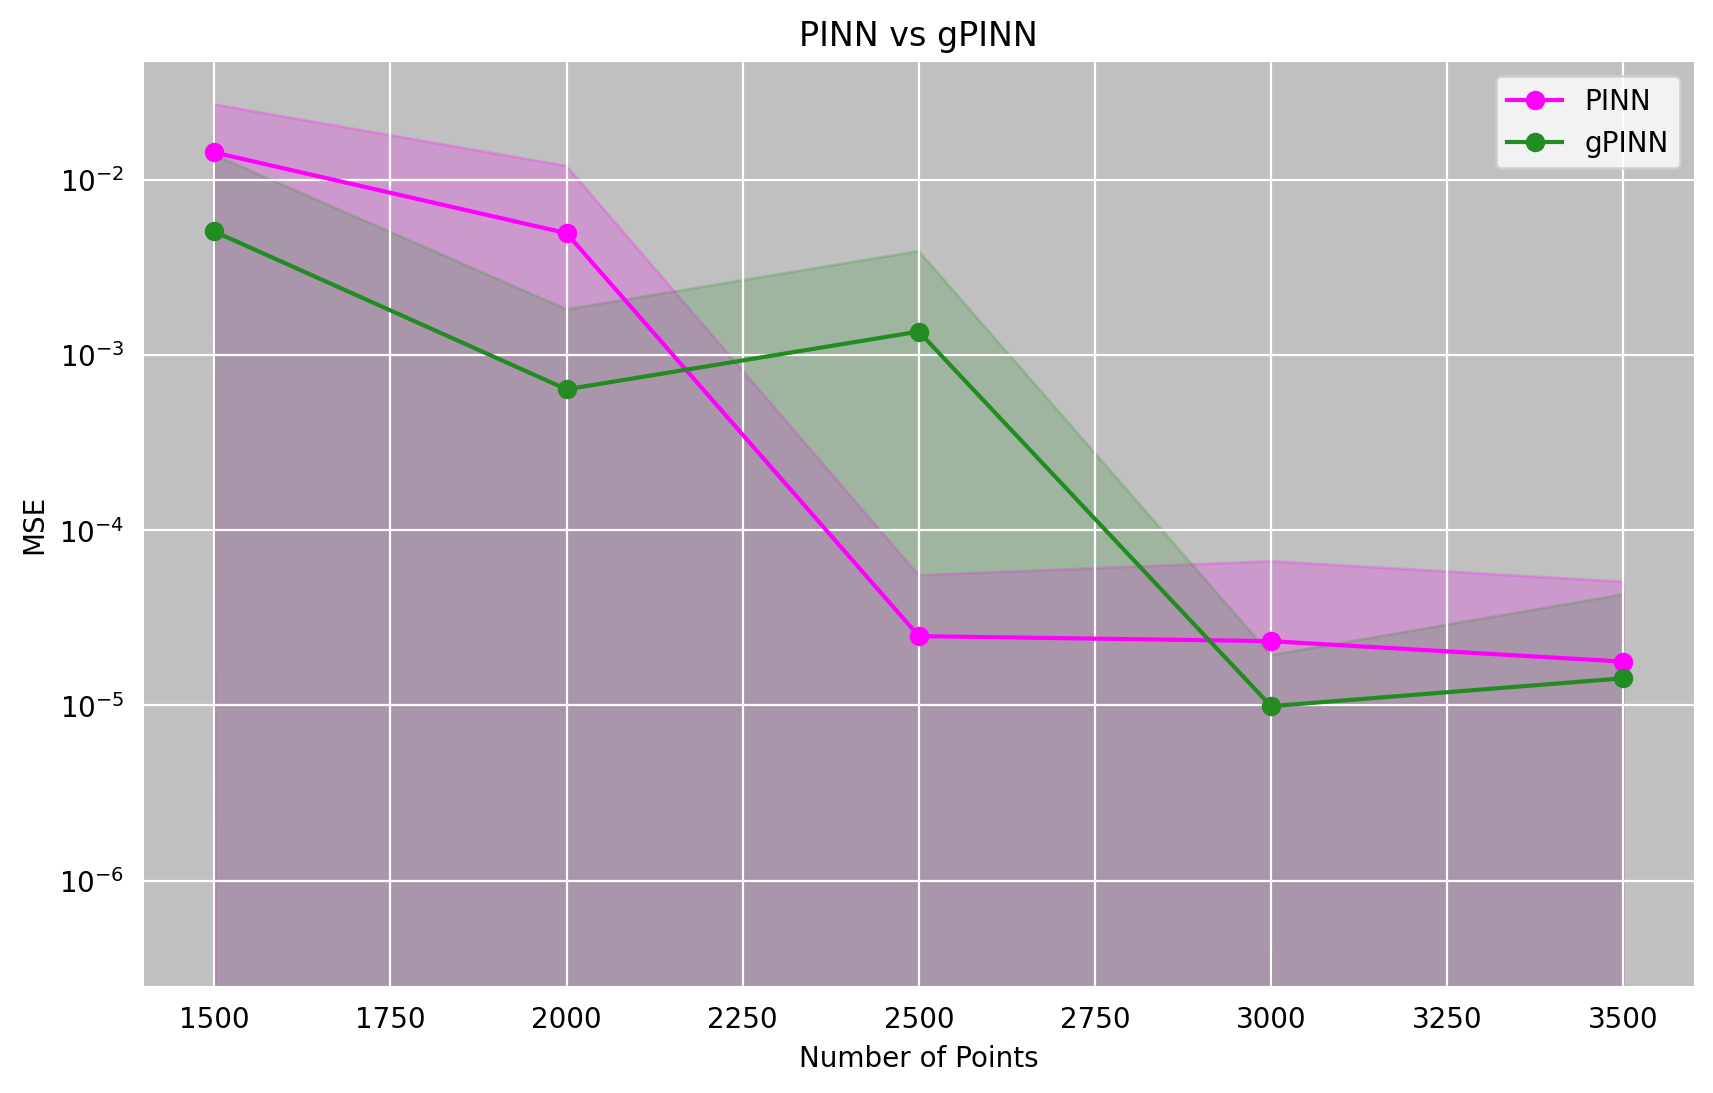

In [27]:
num_points=[1500,2000,2500,3000,3500]
pinn_means=np.array([0.014395481,4.98E-03,2.49E-05,2.33E-05,1.78E-05])
pinn_stds=np.array([0.01266082,0.007061813,3.05728E-05,4.33036E-05,3.30445E-05])

gpinn_means=np.array([0.00509171,6.39E-04,0.001365286,9.91E-06,1.43E-05])
gpinn_stds=np.array([0.008848065,0.00119117,0.002568424,9.47806E-06,2.88524E-05])

ax.plot(num_points,pinn_means,label='PINN',color='fuchsia',marker='o')
ax.fill_between(num_points, pinn_means-pinn_stds, pinn_means+pinn_stds,color='fuchsia',alpha=0.2)
ax.plot(num_points,gpinn_means,label='gPINN',color='forestgreen',marker='o')
ax.fill_between(num_points, gpinn_means-gpinn_stds, gpinn_means+gpinn_stds,alpha=0.2,color='forestgreen')

ax.legend()
fig

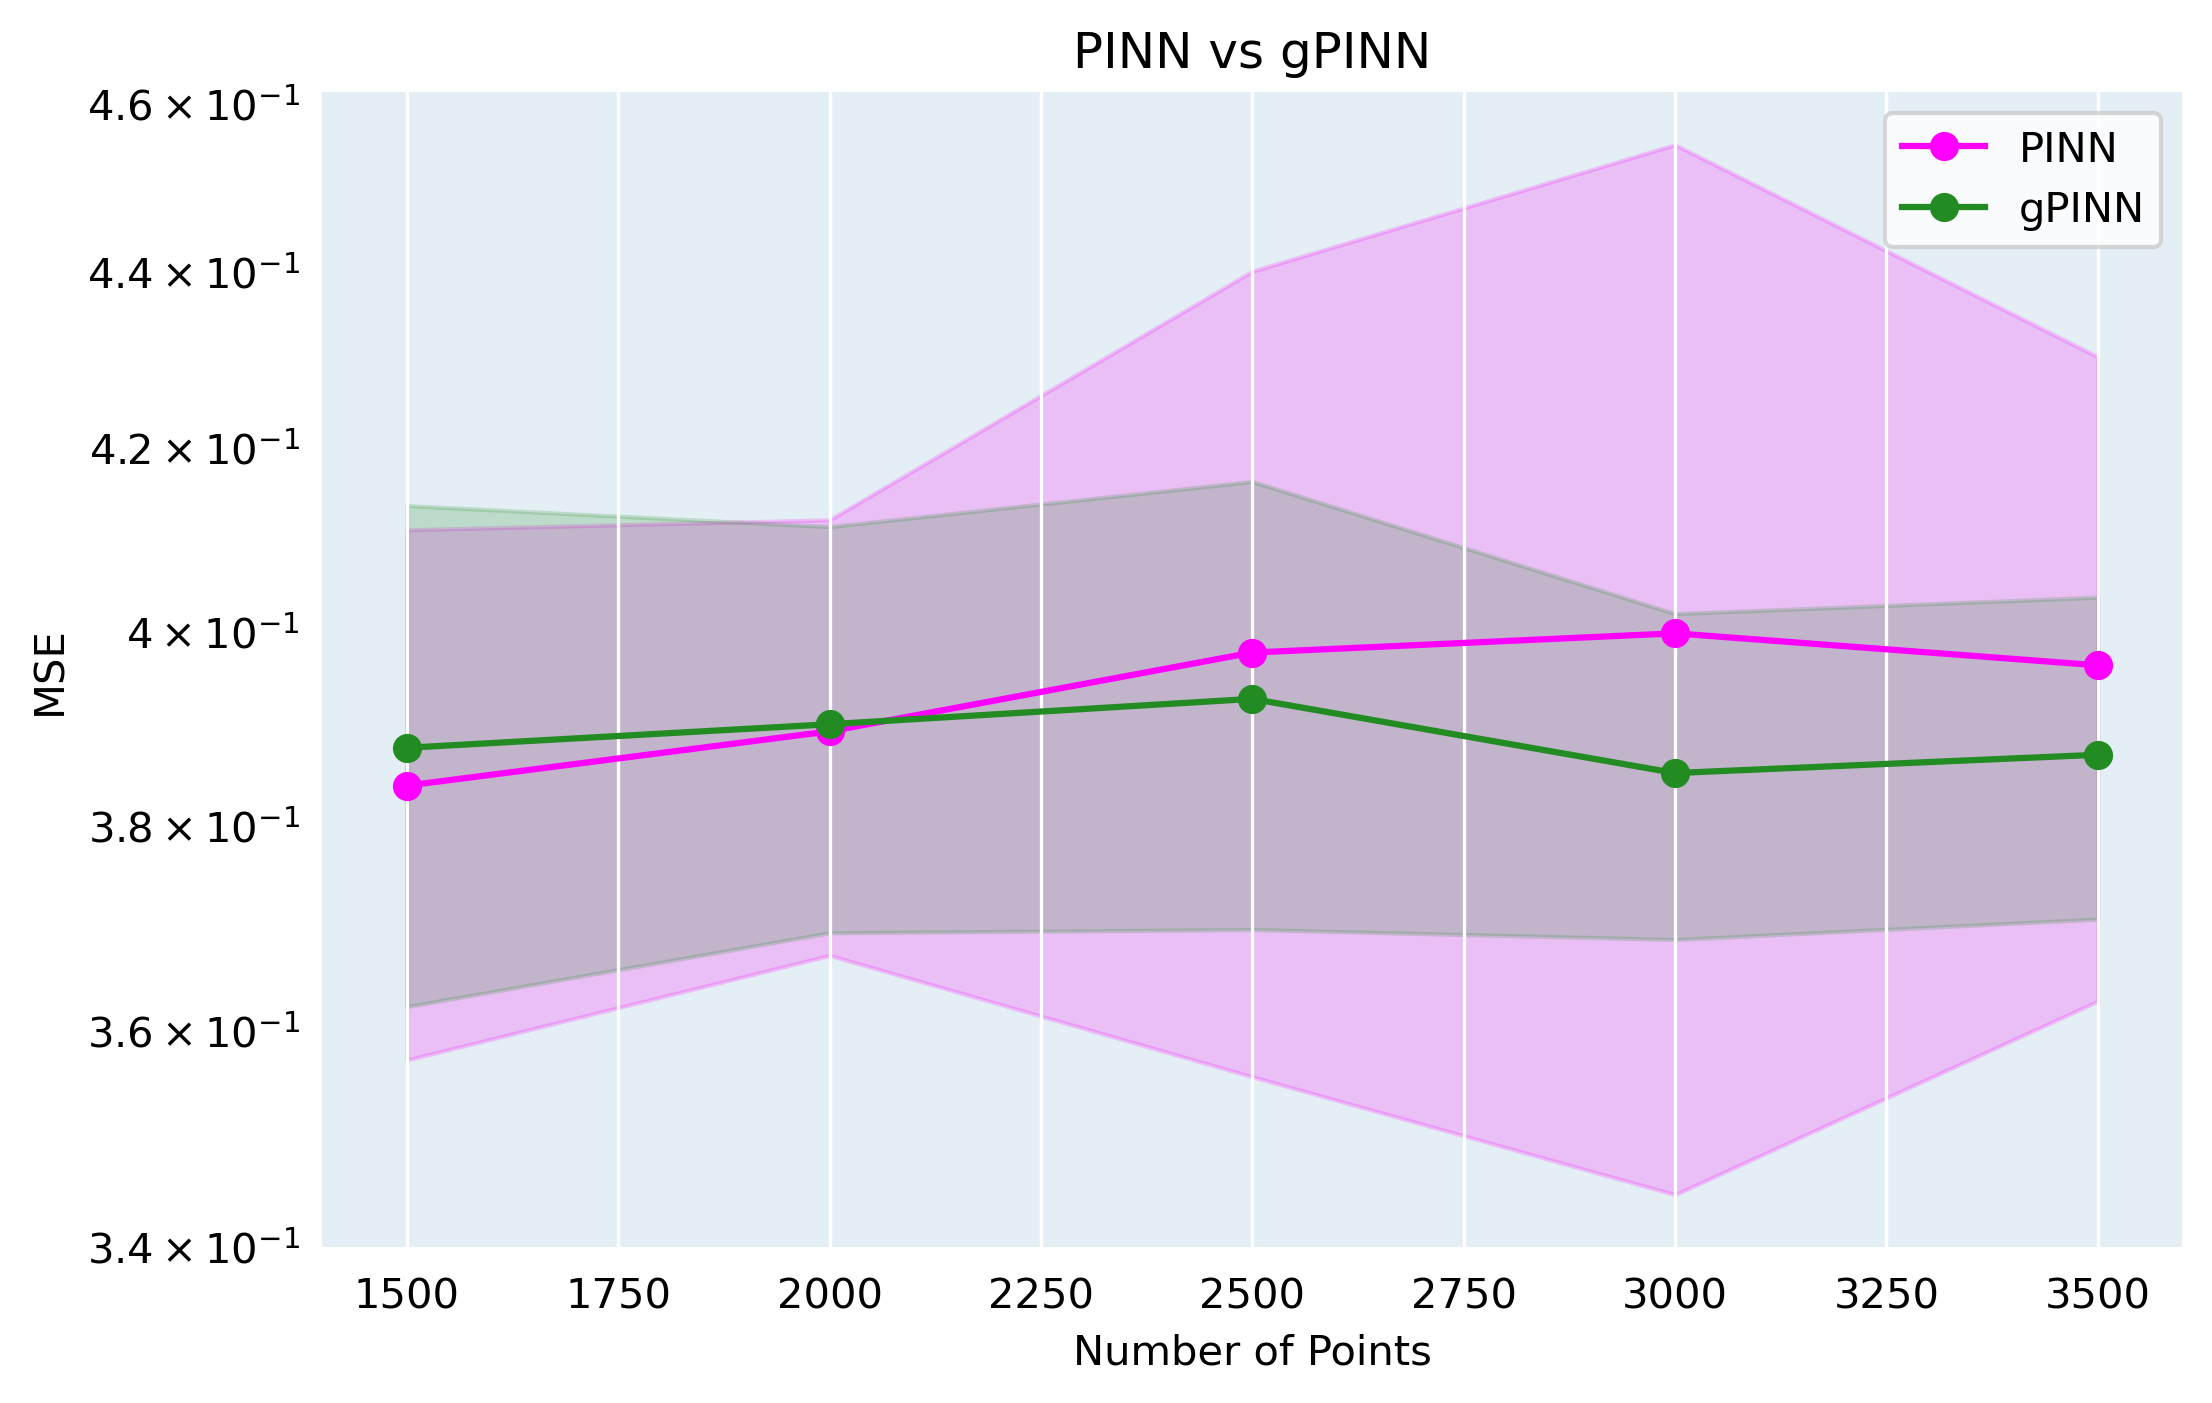

In [32]:
# SUPPRESS RED WARNINGS
fig,ax = create_plot()

import warnings
warnings.filterwarnings("ignore")

ax.grid(axis='y', color='red')

ax.set_facecolor('#e4eff5')
ax.set_title("PINN vs gPINN")
ax.set_xlabel("Number of Points")
ax.set_ylabel("MSE")
ax.set_yscale("log")

# WITH NO BCs/ICs
num_points_arr=[1500,2000,2500,3000,3500]

gpinn_mean_mses = []
gpinn_stds = []
pinn_mean_mses = []
pinn_stds = []
for num_points in num_points_arr:

    vanilla = np.load(f'Data_gPINN_vs_PINN/mses_vanilla_nobc_{num_points}.npy')
    pinn_mean_mses.append(np.mean(vanilla))
    pinn_stds.append(np.std(vanilla))

    gpinn = np.load(f'Data_gPINN_vs_PINN/mses_nobc_{num_points}.npy')
    gpinn_mean_mses.append(np.mean(gpinn))
    gpinn_stds.append(np.std(gpinn))
        
gpinn_mean_mses = np.array(gpinn_mean_mses)
gpinn_stds = np.array(gpinn_stds)
pinn_mean_mses = np.array(pinn_mean_mses)
pinn_stds = np.array(pinn_stds)

ax.plot(num_points_arr,pinn_mean_mses,label='PINN',color='fuchsia',marker='o')
ax.fill_between(num_points_arr, pinn_mean_mses-pinn_stds, pinn_mean_mses+pinn_stds,color='fuchsia',alpha=0.2)
ax.plot(num_points_arr,gpinn_mean_mses,label='gPINN',color='forestgreen',marker='o')
ax.fill_between(num_points_arr, gpinn_mean_mses-gpinn_stds, gpinn_mean_mses+gpinn_stds,alpha=0.2,color='forestgreen')

ax.legend()

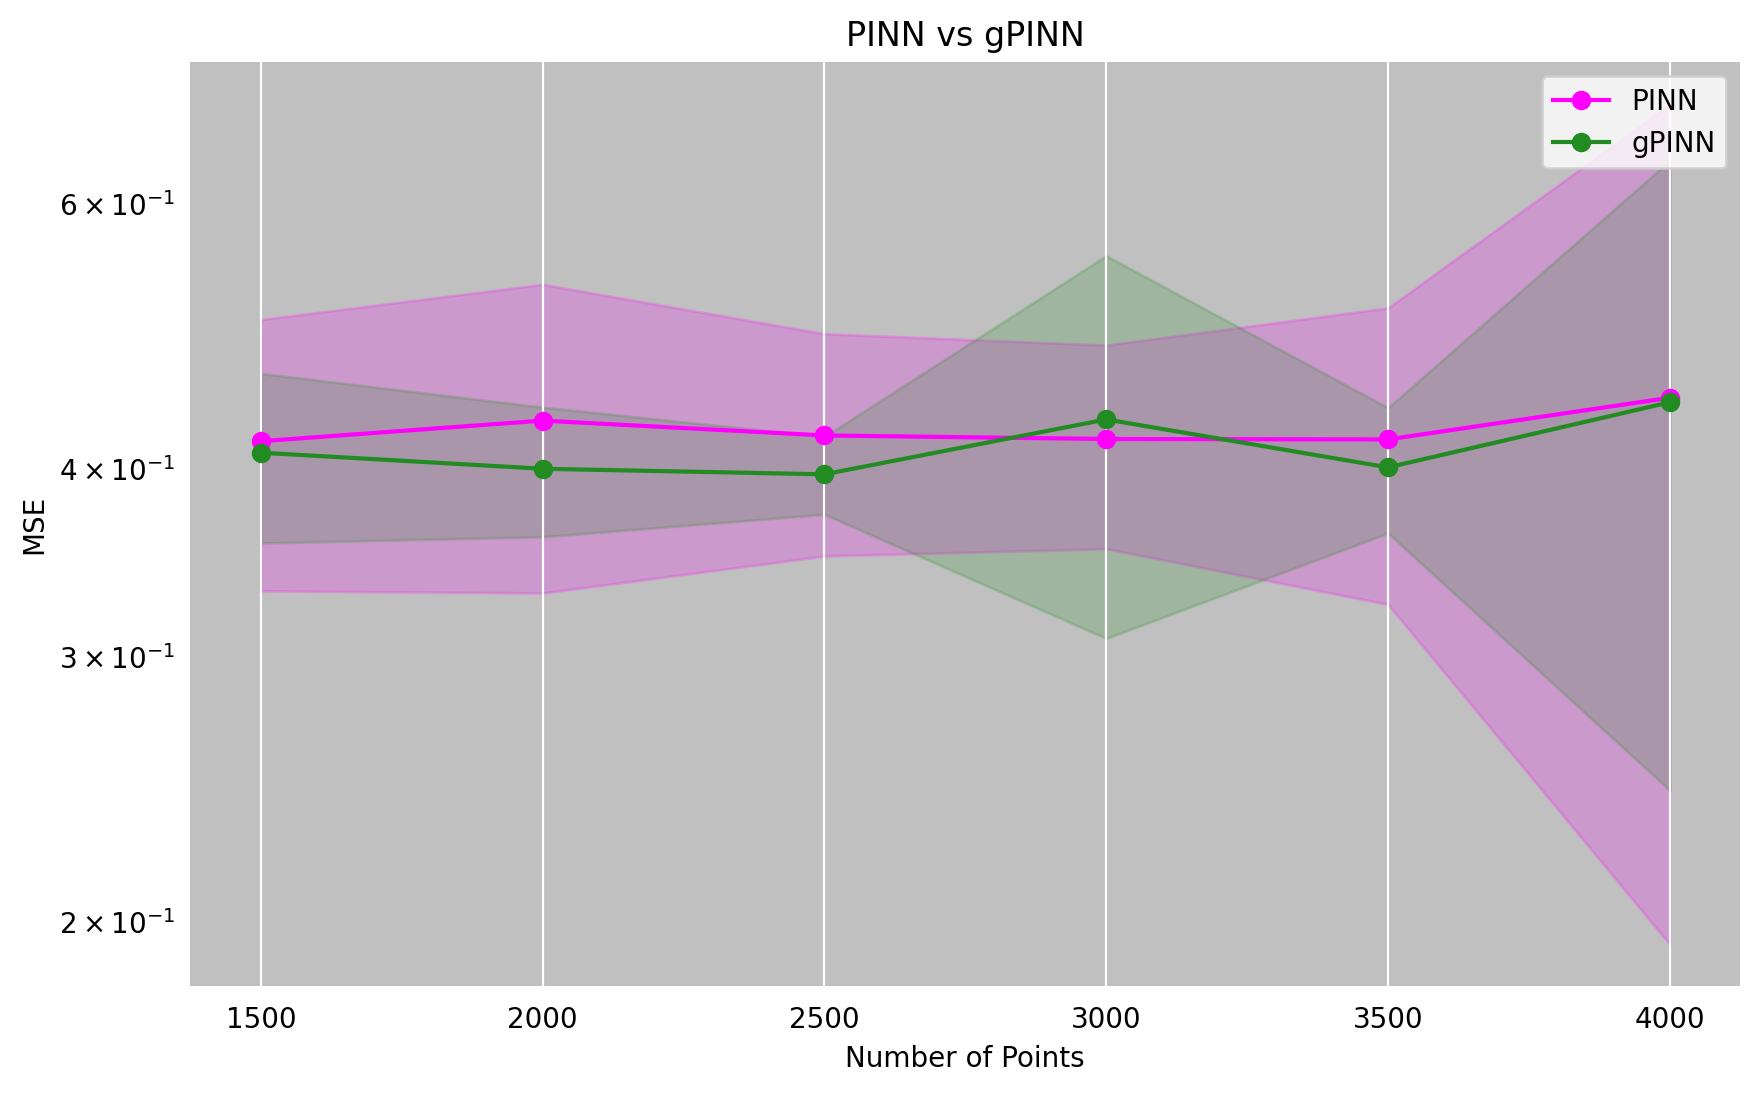

In [9]:
#plot
fig,ax = plt.subplots(figsize=(10,6),dpi=200)
ax.grid(color='white')
ax.set_facecolor("silver")
ax.set_title("PINN vs gPINN")
ax.set_xlabel("Number of Points")
ax.set_ylabel("MSE")
ax.set_yscale("log")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom = False,left = False)
ax.tick_params(axis='x', which='minor', bottom=False, 
               top=False, labelbottom=True) 
ax.tick_params(axis='y', which='minor', right=False, 
               left=False, labelleft=True) 

#data
mses_gpinn_1500 = np.load('Data_gPINN_vs_PINN/mses_gpinn_nobc_adam_1500.npy')
mses_gpinn_2000 = np.load('Data_gPINN_vs_PINN/mses_gpinn_nobc_adam_2000.npy')
mses_gpinn_2500 = np.load('Data_gPINN_vs_PINN/mses_gpinn_nobc_adam_2000.npy')
mses_gpinn_3000 = np.load('Data_gPINN_vs_PINN/mses_gpinn_nobc_adam_2000.npy')
mses_gpinn_3500 = np.load('Data_gPINN_vs_PINN/mses_gpinn_nobc_adam_2000.npy')
mses_gpinn_4000 = np.load('Data_gPINN_vs_PINN/mses_gpinn_nobc_adam_2000.npy')

mses_pinn_2000 = np.load('Data_gPINN_vs_PINN/mses_vanilla_nobc_adam_2000.npy')
mses_pinn_1500 = np.load('Data_gPINN_vs_PINN/mses_vanilla_nobc_adam_1500.npy')
mses_pinn_2500 = np.load('Data_gPINN_vs_PINN/mses_vanilla_nobc_adam_2000.npy')

times_gpinn_1500 = np.load('Data_gPINN_vs_PINN/times_gpinn_nobc_adam_1500.npy')
times_gpinn_2000 = np.load('Data_gPINN_vs_PINN/times_gpinn_nobc_adam_2000.npy')
times_gpinn_2500 = np.load('Data_gPINN_vs_PINN/times_gpinn_nobc_adam_2000.npy')
times_gpinn_3000 = np.load('Data_gPINN_vs_PINN/times_gpinn_nobc_adam_2000.npy')
times_gpinn_3500 = np.load('Data_gPINN_vs_PINN/times_gpinn_nobc_adam_2000.npy')
times_gpinn_4000 = np.load('Data_gPINN_vs_PINN/times_gpinn_nobc_adam_2000.npy')

times_pinn_2000 = np.load('Data_gPINN_vs_PINN/times_vanilla_nobc_adam_2000.npy')
times_pinn_1500 = np.load('Data_gPINN_vs_PINN/times_vanilla_nobc_adam_1500.npy')
times_pinn_2500 = np.load('Data_gPINN_vs_PINN/times_vanilla_nobc_adam_2000.npy')

num_points = [1500,2000,2500,3000,3500,4000]
mean_mses_gpinn = []
stds_gpinn = []
mean_mses_pinn = []
stds_pinn = []
for num in num_points:
    mean_mses_gpinn.append(np.mean(np.load(f'Data_gPINN_vs_PINN/mses_gpinn_nobc_adam_{num}.npy')))
    stds_gpinn.append(np.std(np.load(f'Data_gPINN_vs_PINN/mses_gpinn_nobc_adam_{num}.npy')))
    mean_mses_pinn.append(np.mean(np.load(f'Data_gPINN_vs_PINN/mses_vanilla_nobc_adam_{num}.npy')))
    stds_pinn.append(np.std(np.load(f'Data_gPINN_vs_PINN/mses_vanilla_nobc_adam_{num}.npy')))

mean_mses_gpinn = np.array(mean_mses_gpinn)
stds_gpinn = np.array(stds_gpinn)
mean_mses_pinn = np.array(mean_mses_pinn)
stds_pinn = np.array(stds_pinn)
    
ax.plot(num_points,mean_mses_pinn,label='PINN',color='fuchsia',marker='o')
ax.fill_between(num_points, mean_mses_pinn-stds_pinn, mean_mses_pinn+stds_pinn,color='fuchsia',alpha=0.2)
ax.plot(num_points,mean_mses_gpinn,label='gPINN',color='forestgreen',marker='o')
ax.fill_between(num_points, mean_mses_gpinn-stds_gpinn, mean_mses_gpinn+stds_gpinn,color='forestgreen',alpha=0.2)

ax.legend()
#np.load(f'mses_pinn_nobc_adam_3000.npy')

In [11]:
np.load(f'Data_gPINN_vs_PINN/mses_gpinn_nobc_adam_1500.npy')

array([0.34665764, 0.41736522, 0.38801922, 0.3900391 , 0.43798633,
       0.41751628, 0.40836442, 0.39290477, 0.43860077, 0.38316345,
       0.37093687, 0.53982888, 0.52517724, 0.37580633, 0.38190748,
       0.39060826, 0.36107017, 0.39072936, 0.41661144, 0.38851964,
       0.58423591, 0.37244517, 0.39893714, 0.46716355, 0.40248179,
       0.39518549, 0.37689925, 0.36786494, 0.39380994, 0.3823296 ])

In [22]:
def create_plot():
    fig,ax = plt.subplots(figsize=(10,6),dpi=200)
    ax.grid(color='white')
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_facecolor("aliceblue")
    ax.set_title("Burgers' Equation Pareto Curve")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("MSE")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(bottom = False,left = False)
    ax.tick_params(axis='x', which='minor', bottom=False, 
                   top=False, labelbottom=True) 
    ax.tick_params(axis='y', which='minor', right=False, 
                   left=False, labelleft=True) 
    
    return fig,ax

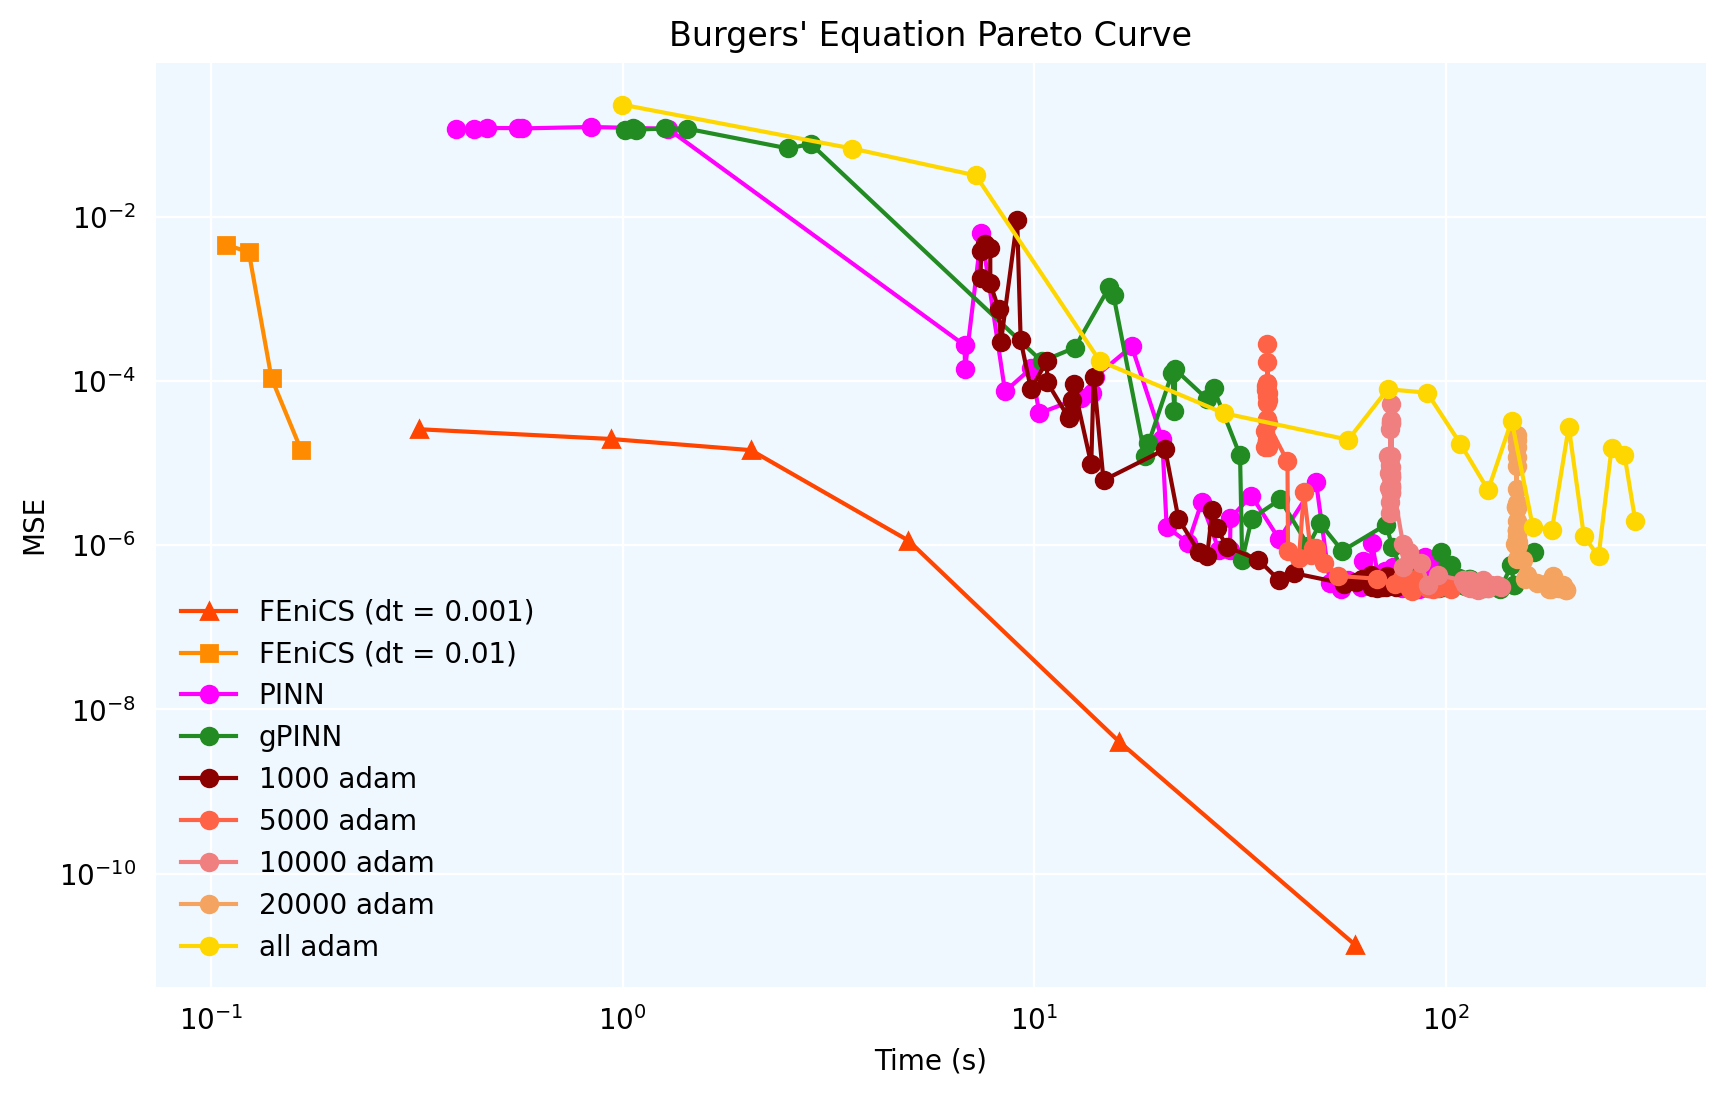

In [10]:
##### APR 2

# WITH OTHER TIMESTEP

fig,ax=create_plot()

# Create FEniCS data
times_fenics = [59.9866251945495,16.0761799812316,4.94502711296081,2.04935121536254,0.935578823,0.319884539,0.165743112564086,0.140399456024169,0.123669147491455,0.109034776687622]
mse_fenics = [1.37E-11,4.04E-09,1.14E-06,1.44E-05,1.97E-05,2.59E-05,1.44E-05,0.000108454,0.00372555,0.004554599]
labels_fenics = ['n = 8193, dt = 0.001','e_num/dt = 2049000','e_num/dt = 513000','e_num/dt = 129000','e_num/dt = 33000','e_num/dt = 9000','e_num/dt = 102500','e_num/dt = 25700','e_num/dt = 6500','e_num/dt=3300','e_num/dt = 1700','e_num/dt = 500']
markers_fenics = ['^','^','^','^','^','^','s','s','s','s','^','h','8','>','D','X','H','o','s','s','s']
colors_fenics = ['red','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold','greenyellow','cyan','orange','blue','purple','green','slategray','darkcyan','coral','orchid','gold']
#for x, y, label, color, shape in zip(times_fenics, mse_fenics, labels_fenics, colors_fenics, markers_fenics):
    #ax.scatter(x, y, color=color, marker=shape,label=label)
ax.plot(times_fenics[0:6],mse_fenics[0:6],label="FEniCS (dt = 0.001)",color='orangered',marker='^')
ax.plot(times_fenics[6:],mse_fenics[6:],label="FEniCS (dt = 0.01)",color='darkorange',marker='s')

load = np.load('Data_diff_train/vanilla_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='PINN',color='fuchsia',marker='o')
# 8 x 40 PINN, 20000 domain, 400 boundary 400 ic

load = np.load('gPINN_times_mses.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
#ax.plot(times[time_inds],mses[time_inds],label='gPINN',color='forestgreen',marker='o')

load = np.load('gPINN_times_mses_20000nf400nb.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='gPINN',color='forestgreen',marker='o')
##############################################

load = np.load('vanilla_times_mses_1000adam_lbfgs.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='1000 adam',color='darkred',marker='o')

load = np.load('vanilla_times_mses_5000adam_lbfgs.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='5000 adam',color='tomato',marker='o')

load = np.load('vanilla_times_mses_10000adam_lbfgs.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='10000 adam',color='lightcoral',marker='o')

load = np.load('vanilla_times_mses_20000adam_lbfgs.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='20000 adam',color='sandybrown',marker='o')

load = np.load('vanilla_times_mses_alladam2.npy')
times = load[0]
time_inds = np.argsort(times)
mses = load[1]
ax.plot(times[time_inds],mses[time_inds],label='all adam',color='gold',marker='o')


#############################################
    
    
ax.legend(framealpha=0)

In [8]:
load

array([[2.91347428e+02],
       [6.04284085e-06]])